# Arrests and Strip Searches
*This dataset includes information related to all arrests and strip searches.

This dataset includes information related to all arrests and strip searches. A strip search refers to a search conducted by a police officer on a person, which includes the removal of some or all clothing and a visual inspection of the body. The dataset also includes indicators of whether a person was booked at a police station within 24 hours following a particular arrest event. Due to issues with the booking template, there may be some records where a person was strip searched, but the data does not indicate a booking (i.e., value = 0); in those cases, the user should presume a booking took place.

The location of arrest is aggregated to the Division level and refers to where the arrest took place within Division boundaries. Users should not interpret location as the Division to which the arresting officer was assigned. For some arrests, the location could not be geo-coded or the arrest took place outside of City of Toronto boundaries in other jurisdictions; these are indicated by XX. The age of person arrested and/or strip searched is their age at the time of the arrest, as given to the arresting officer*

In [79]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from math import sqrt
from statsmodels.stats.power import FTestAnovaPower
!pip install pingouin
import pingouin as pg

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import ttest_ind


import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df=pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001) (final).csv')
print(df)

       Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2      Unknown or Legacy   M      Aged 35 to 44 

# Exploratory data analysis


In [5]:
#shape of dataset
df.shape

(65276, 25)

We can see that there are 65276 instances and 25 attributes in the dataset. In the dataset description, it is given that there are 65276 instances and 25 attributes in the dataset. Next, we should take a look at the dataset to gain more insight about it.

**Preview the dataset**

In [6]:
#First Five Dataset
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

In [7]:
#Last Five Rows of Dataset
df.tail()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
65271         Indigenous   F      Aged 25 to 34 years   
65272        South Asian   M      Aged 35 to 44 years   
65273              White   F      Aged 45 to 54 years   
65274  Unknown or Legacy   M  Aged 17 years and under   
65275             Latino   M      Aged 18 to 24 years   

       Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
65271                      Not a youth           XX  ...   
65272                      Not a youth           54  ...   
65273                      Not a youth           XX  ...   
65274  Youth (aged 17 years and under)           XX  ...   
65275                      Not a youth           XX  ...   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
65271                                1                                0   
65272                                0                                0   
65273                                0                                0   
65274                                0                                0   
65275                                0                                0   

      Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
65271                               0                                0   
65272                               0                                0   
65273                               0                                0   
65274                               0                                1   
65275                               0                                1   

       SearchReason_CauseInjury  SearchReason_AssistEscape  \
65271                       NaN                        NaN   
65272                       NaN                        NaN   
65273                       NaN                        NaN   
65274                       NaN                        NaN   
65275                       NaN                        NaN   

       SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
65271                          NaN                           NaN         NaN   
65272                          NaN                           NaN         NaN   
65273                          NaN                           NaN         NaN   
65274                          NaN                           NaN         NaN   
65275                          NaN                           NaN         NaN   

       ObjectId  
65271     65272  
65272     65273  
65273     65274  
65274     65275  
65275     65276  

[5 rows x 25 columns]

**Check for missing values in dataset**

In [8]:
#identify the null values
df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [9]:
df = df.drop(['SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound'], axis=1)

**View summary of dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [11]:
df=df.dropna()
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
ObjectId                           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64615 entries, 0 to 65275
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      64615 non-null  int64  
 1   Arrest_Month                     64615 non-null  object 
 2   EventID                          64615 non-null  int64  
 3   ArrestID                         64615 non-null  float64
 4   PersonID                         64615 non-null  int64  
 5   Perceived_Race                   64615 non-null  object 
 6   Sex                              64615 non-null  object 
 7   Age_group__at_arrest_            64615 non-null  object 
 8   Youth_at_arrest__under_18_years  64615 non-null  object 
 9   ArrestLocDiv                     64615 non-null  object 
 10  StripSearch                      64615 non-null  int64  
 11  Booked                           64615 non-null  int64  
 12  Occurrence_Categor

We can see that the dataset contains mixture of categorical and numerical variables. 

**Explore numerical variables**

***View the statistical summary of numerical variables***

In [13]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['Arrest_Year', 'EventID', 'ArrestID', 'PersonID', 'StripSearch', 'Booked', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'ObjectId']


In [14]:
df.describe()

Arrest_Year       EventID      ArrestID       PersonID   StripSearch  \
count  64615.000000  6.461500e+04  6.461500e+04   64615.000000  64615.000000   
mean    2020.512172  1.029991e+06  6.032400e+06  318601.913426      0.113457   
std        0.499856  1.731938e+04  1.870613e+04   10813.930258      0.317153   
min     2020.000000  1.000000e+06  6.000000e+06  300000.000000      0.000000   
25%     2020.000000  1.014988e+06  6.016200e+06  309219.500000      0.000000   
50%     2021.000000  1.029987e+06  6.032402e+06  318594.000000      0.000000   
75%     2021.000000  1.044998e+06  6.048596e+06  327922.000000      0.000000   
max     2021.000000  1.060002e+06  6.064804e+06  337346.000000      1.000000   

             Booked  Actions_at_arrest___Concealed_i  \
count  64615.000000                     64615.000000   
mean       0.524383                         0.004101   
std        0.499409                         0.063910   
min        0.000000                         0.000000   
25%        0.000000                         0.000000   
50%        1.000000                         0.000000   
75%        1.000000                         0.000000   
max        1.000000                         1.000000   

       Actions_at_arrest___Combative__  Actions_at_arrest___Resisted__d  \
count                     64615.000000                     64615.000000   
mean                          0.044417                         0.038474   
std                           0.206021                         0.192339   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
count                     64615.000000                     64615.000000   
mean                          0.033584                         0.006392   
std                           0.180156                         0.079693   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Cooperative      ObjectId  
count                     64615.000000  64615.000000  
mean                          0.449400  32650.352735  
std                           0.497437  18844.019884  
min                           0.000000      1.000000  
25%                           0.000000  16333.500000  
50%                           0.000000  32645.000000  
75%                           1.000000  48989.500000  
max                           1.000000  65276.000000

***Check Outliers***

In [15]:
print(round(df[numerical].describe()),2)

       Arrest_Year    EventID   ArrestID  PersonID  StripSearch   Booked  \
count      64615.0    64615.0    64615.0   64615.0      64615.0  64615.0   
mean        2021.0  1029991.0  6032400.0  318602.0          0.0      1.0   
std            0.0    17319.0    18706.0   10814.0          0.0      0.0   
min         2020.0  1000000.0  6000000.0  300000.0          0.0      0.0   
25%         2020.0  1014988.0  6016200.0  309220.0          0.0      0.0   
50%         2021.0  1029987.0  6032402.0  318594.0          0.0      1.0   
75%         2021.0  1044998.0  6048596.0  327922.0          0.0      1.0   
max         2021.0  1060002.0  6064804.0  337346.0          1.0      1.0   

       Actions_at_arrest___Concealed_i  Actions_at_arrest___Combative__  \
count                          64615.0                          64615.0   
mean                               0.0                              0.0   
std                                0.0                              0.0   
min            

On closer inspection, there is no large outliers in this dataset for numerical variables.

***Histogram for All Numerical Variables***

Text(0.5, 0.98, 'Histogram Plots for All Numeric Variables')

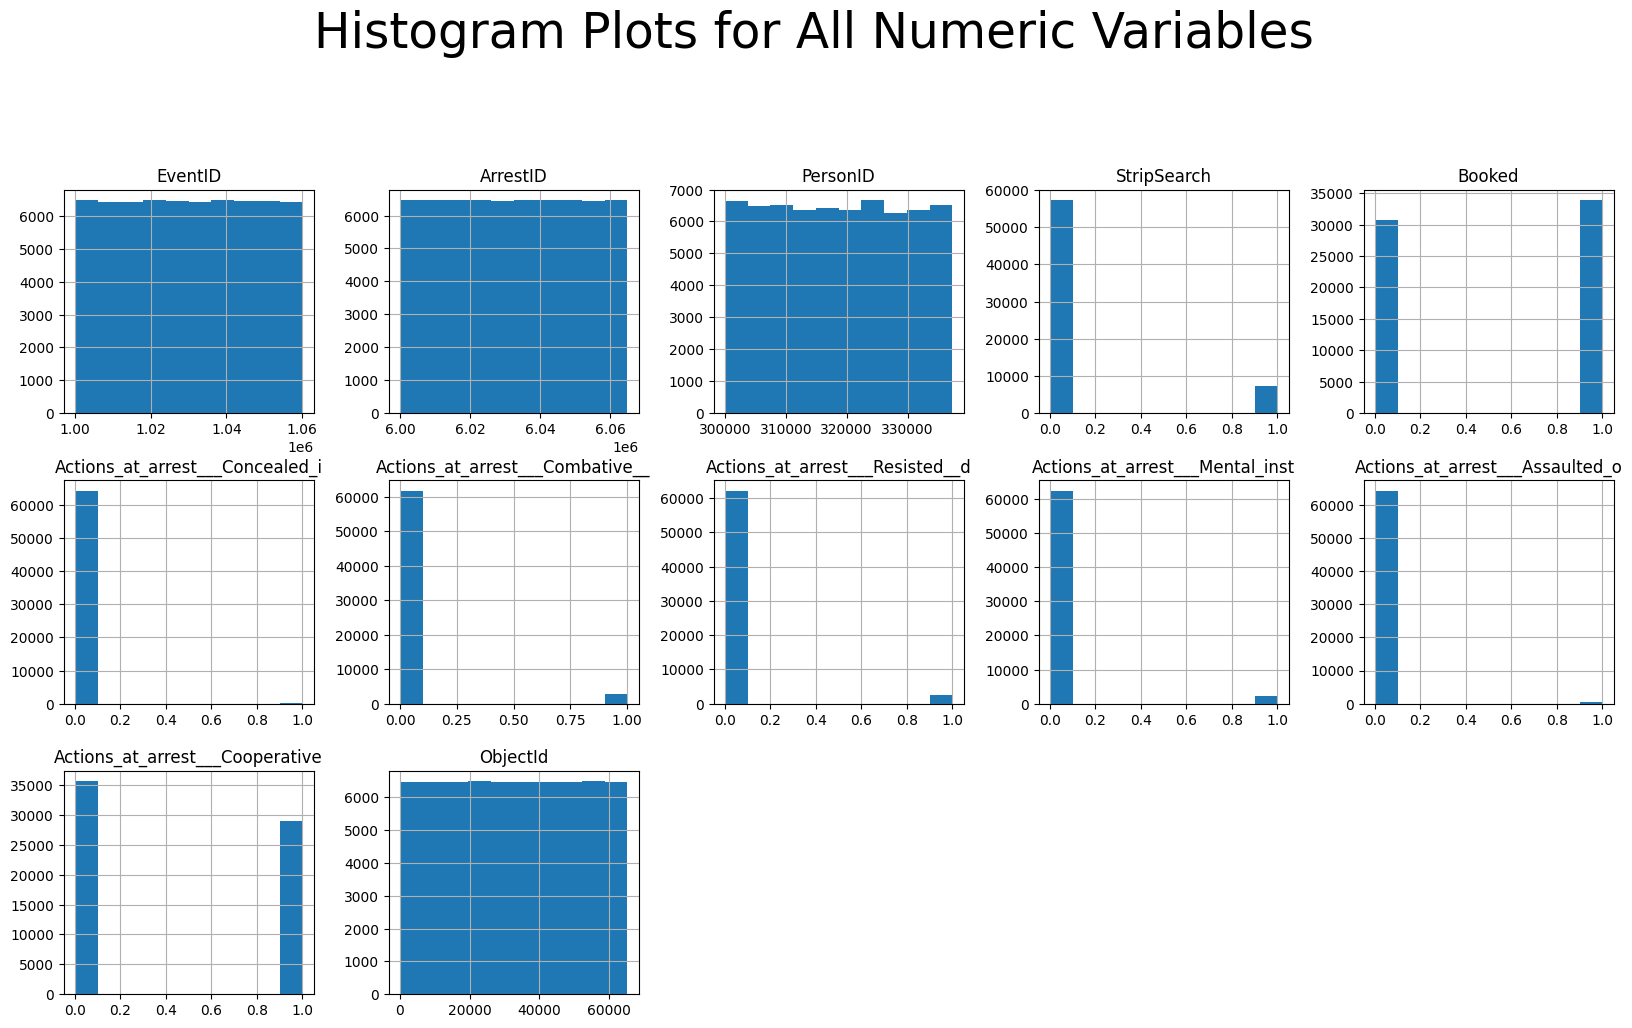

In [16]:
df.iloc[:,1:].hist(layout=(5,5), figsize=(20,18), grid=True)
plt.suptitle("Histogram Plots for All Numeric Variables", fontsize=35)

**Explore categorical variables**

In [17]:
# view the labels in the variable
df['Arrest_Month'].unique()

array(['July-Sept', 'Oct-Dec', 'Jan-Mar', 'Apr-June'], dtype=object)

In [18]:
len(df['Arrest_Month'].unique())

4

In [19]:
df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [20]:
len(df['Perceived_Race'].unique())

8

In [21]:
df['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [22]:
len(df['Sex'].unique())

3

In [23]:
df['Age_group__at_arrest_'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 and older',
       'Aged 65 years and older', 'Aged 17 years and younger',
       'Aged 17 years and under'], dtype=object)

In [24]:
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 17 years and younger', 'Aged 17 years and under')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')

In [25]:
df['Age_group__at_arrest_'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 years and older',
       'Aged 17 years and under'], dtype=object)

In [26]:
len(df['Age_group__at_arrest_'].unique())

7

In [27]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [28]:
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')


In [29]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 years and under)'], dtype=object)

In [30]:
len(df['Youth_at_arrest__under_18_years'].unique())

2

In [31]:
df['ArrestLocDiv'].unique()

array(['54', 'XX', '42', '52', '14', '51', '53', '31', '11', '12', '13',
       '41', '22', '55', '43', '23', '33', '32'], dtype=object)

In [32]:
len(df['ArrestLocDiv'].unique())

18

In [33]:
df['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Robbery & Theft', 'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [34]:
len(df['Occurrence_Category'].unique())

31

These categories are small in length, and we have 64615 data, so we don't need to drop them

**Univariate Analysis-Explore target variable**

In [35]:
df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years        20725
Aged 35 to 44 years        16072
Aged 18 to 24 years         9934
Aged 45 to 54 years         9003
Aged 55 to 64 years         4553
Aged 17 years and under     3012
Aged 65 years and older     1316
Name: Age_group__at_arrest_, dtype: int64

In [36]:
df['Age_group__at_arrest_'].value_counts()/len(df)

Aged 25 to 34 years        0.320746
Aged 35 to 44 years        0.248735
Aged 18 to 24 years        0.153741
Aged 45 to 54 years        0.139333
Aged 55 to 64 years        0.070464
Aged 17 years and under    0.046615
Aged 65 years and older    0.020367
Name: Age_group__at_arrest_, dtype: float64

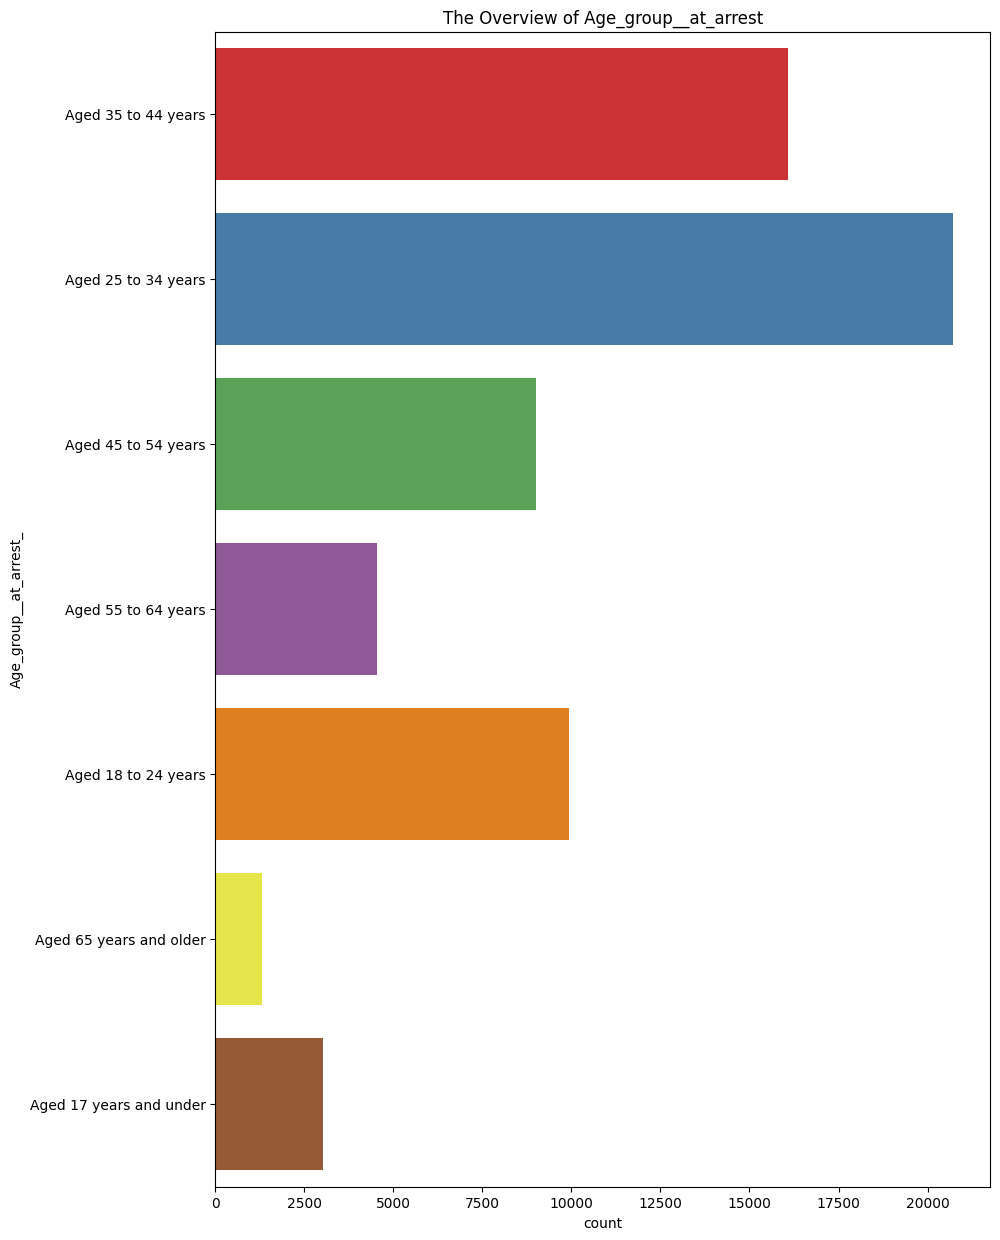

In [37]:
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.countplot(y="Age_group__at_arrest_", data=df, palette="Set1")
plt.title("The Overview of Age_group__at_arrest")
plt.show()

Findings of Univariate Analysis 
The number of unique values in Age_group__at_arrest_ variable is 9(unique value).

Out of the total number of Age_group__at_arrest_ values, Aged 25 to 34 years appears 20725 times ranked as the top.

The univariate plot confirms our findings.

In [38]:
def plot_histogram(row, title):
    fig = px.histogram(df, x='Age_group__at_arrest_', color=row, 
                  height=600, title=title, 
                  color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [39]:
plot_histogram('Arrest_Year', 'Arrest_Year VS Age_group__at_arrest')


In [40]:
plot_histogram('Sex','Sex VS Age_group__at_arrest')

In [41]:
plot_histogram('Perceived_Race', 'Perceived_Race VS Age_group__at_arrest')

In [42]:
plot_histogram('ArrestLocDiv', 'ArrestLocDiv VS Age_group__at_arrest')

In [43]:
plot_histogram('Occurrence_Category','Occurrence_Category VS Age_group_at_arrest')

**Multivariate Analysis**

To discover patterns and relationships between variables in the dataset

***Label encoding categorical variables***

In [44]:
df['Sex'] = df['Sex'].fillna('None')
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [45]:
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].fillna('None')
label_encoder = LabelEncoder()
df['Age_group__at_arrest_'] = label_encoder.fit_transform(df['Age_group__at_arrest_'])

In [46]:
df['Arrest_Month'] = df['Arrest_Month'].fillna('None')
label_encoder = LabelEncoder()
df['Arrest_Month'] = label_encoder.fit_transform(df['Arrest_Month'])

df['Perceived_Race'] = df['Perceived_Race'].fillna('None')
label_encoder = LabelEncoder()
df['Perceived_Race'] = label_encoder.fit_transform(df['Perceived_Race'])

df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].fillna('None')
label_encoder = LabelEncoder()
df['Youth_at_arrest__under_18_years'] = label_encoder.fit_transform(df['Youth_at_arrest__under_18_years'])

df['ArrestLocDiv'] = df['ArrestLocDiv'].fillna('None')
label_encoder = LabelEncoder()
df['ArrestLocDiv'] = label_encoder.fit_transform(df['ArrestLocDiv'])

df['Occurrence_Category'] = df['Occurrence_Category'].fillna('None')
label_encoder = LabelEncoder()
df['Occurrence_Category'] = label_encoder.fit_transform(df['Occurrence_Category'])

In [47]:
correlation = df.corr()

***Heat Map***

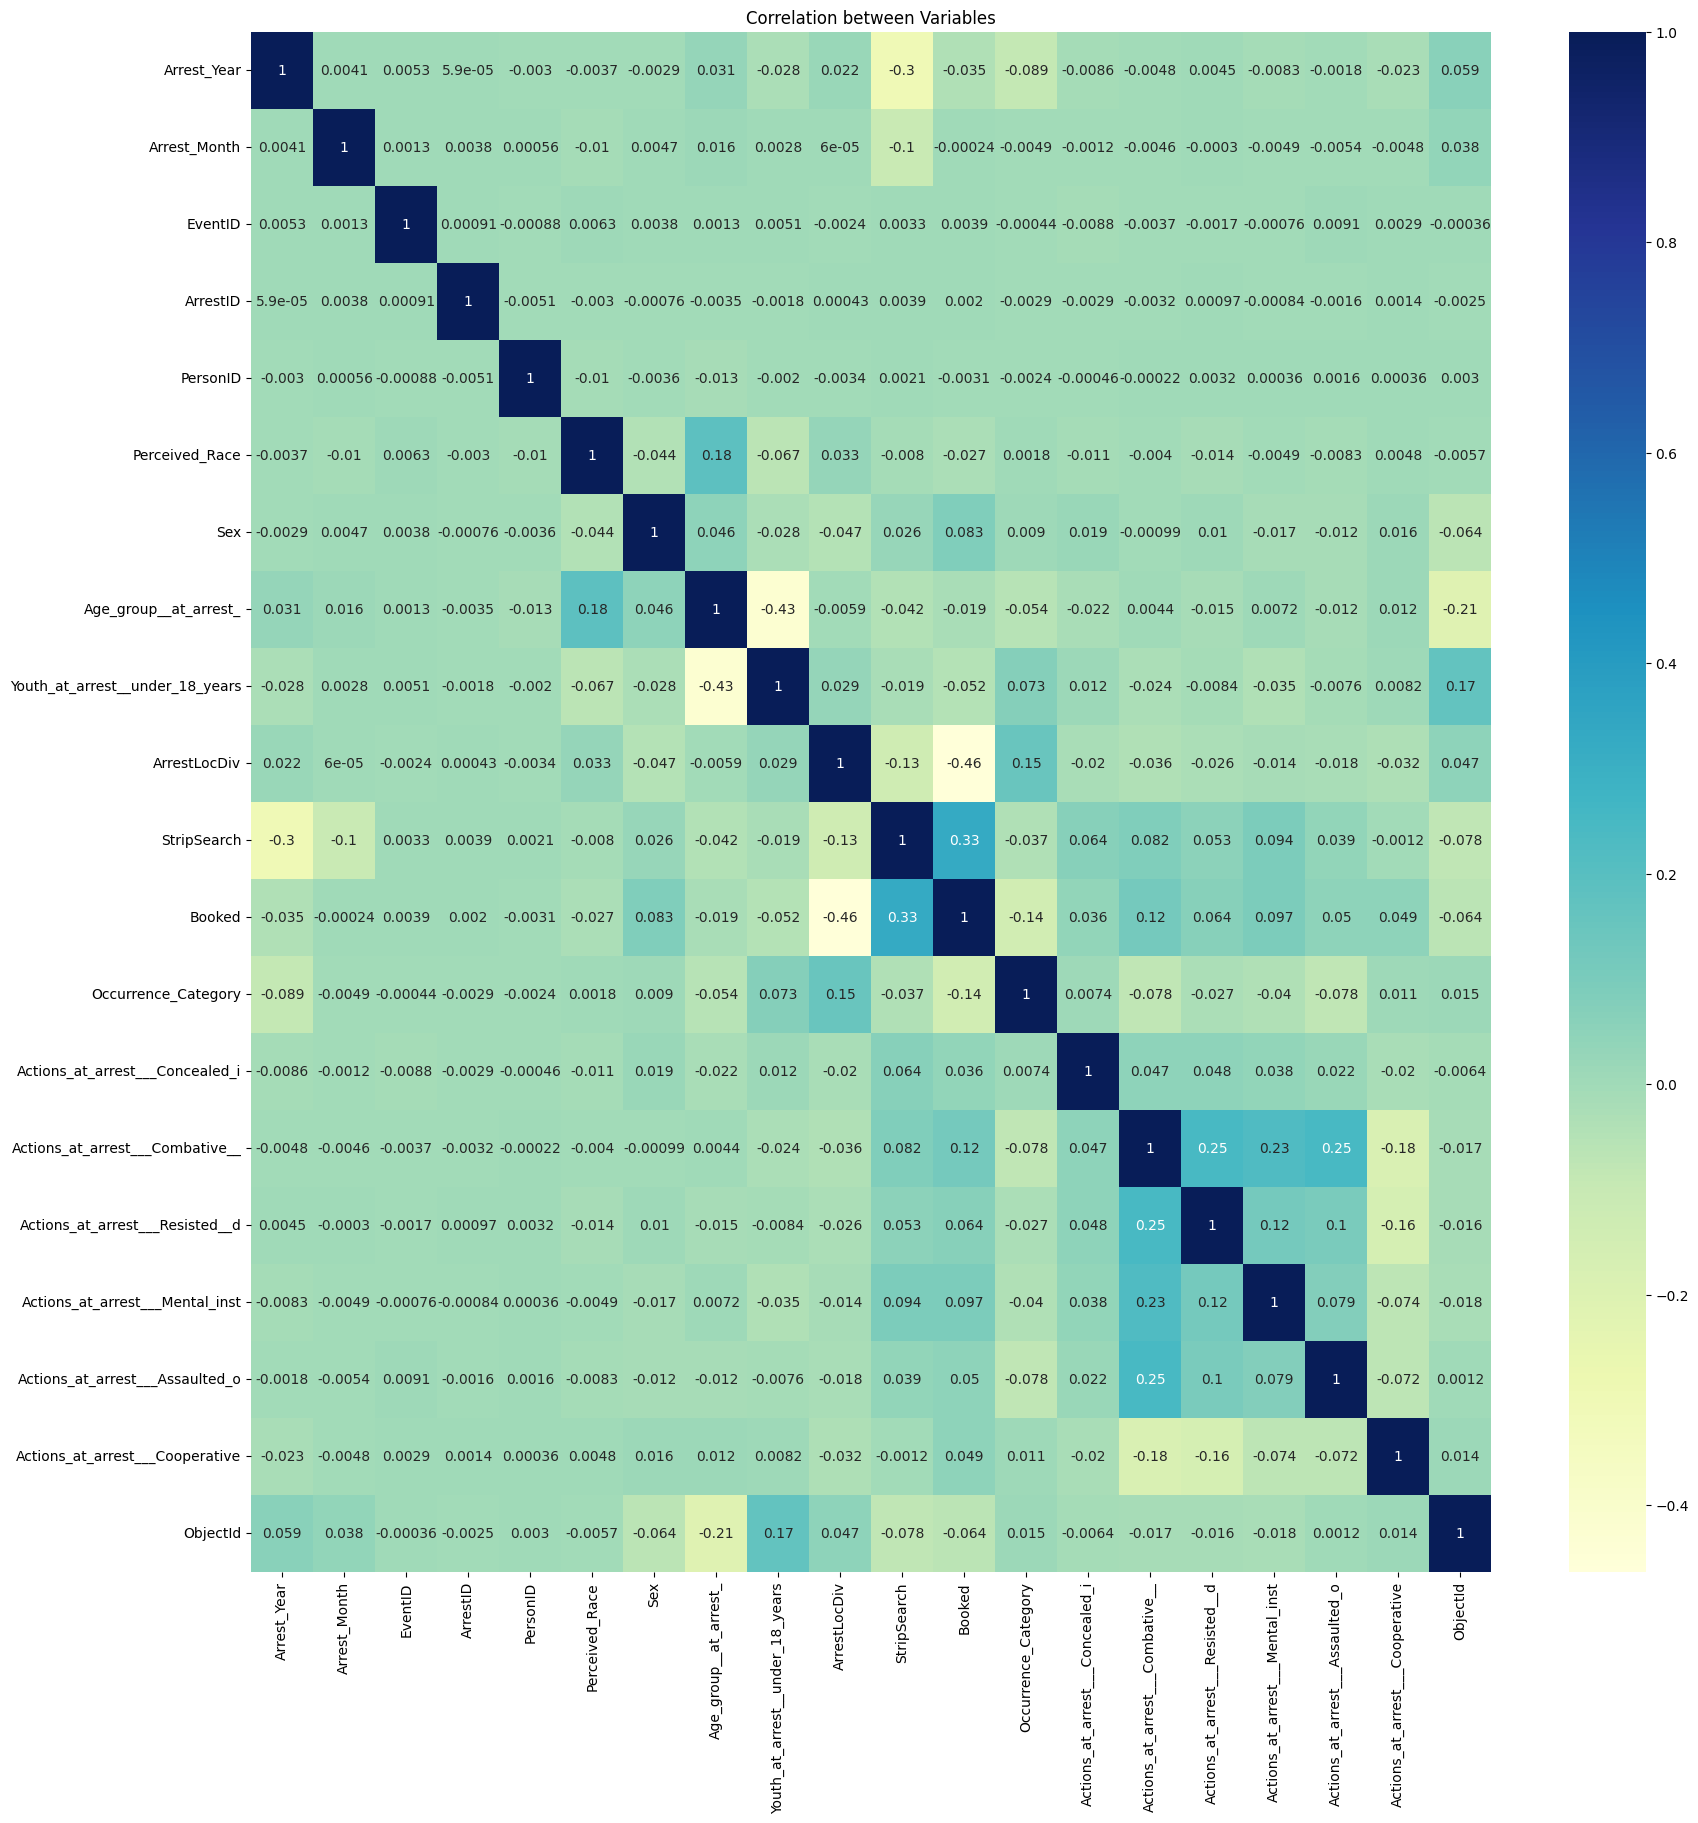

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True , cmap="YlGnBu")
plt.title("Correlation between Variables")
plt.show()

Relatively speaking, booked and arrestlocDiv, youth at arrest under 18 and age group at arrest, booked and StripSearch, arrest year and stripsearch, Actions_at_arrest___Combative__ and Actions_at_arrest___Assaulted_o, Actions_at_arrest___Combative__ and Actions_at_arrest___Resisted__d have weakly correlation. then we draw pairplot to depict relationship between these variables.

In [49]:
from scipy.stats import shapiro
stat, p = shapiro(df['Age_group__at_arrest_'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=0.940, p=0.000
Data does not look Gaussian (reject H0)


In [50]:
Features = ['Arrest_Year', 'Arrest_Month', 
       'Perceived_Race', 'Sex', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'Youth_at_arrest__under_18_years']

for feature in Features:
    stat, p = shapiro(df[feature])
    print(f'{feature}: Shapiro-Wilk test stat={stat:.4f}, p={p:.4f}')

Arrest_Year: Shapiro-Wilk test stat=0.6361, p=0.0000
Arrest_Month: Shapiro-Wilk test stat=0.8630, p=0.0000
Perceived_Race: Shapiro-Wilk test stat=0.7556, p=0.0000
Sex: Shapiro-Wilk test stat=0.4844, p=0.0000
ArrestLocDiv: Shapiro-Wilk test stat=0.8114, p=0.0000
StripSearch: Shapiro-Wilk test stat=0.3674, p=0.0000
Booked: Shapiro-Wilk test stat=0.6353, p=0.0000
Occurrence_Category: Shapiro-Wilk test stat=0.8993, p=0.0000
Actions_at_arrest___Concealed_i: Shapiro-Wilk test stat=0.0359, p=0.0000
Actions_at_arrest___Combative__: Shapiro-Wilk test stat=0.2073, p=0.0000
Actions_at_arrest___Resisted__d: Shapiro-Wilk test stat=0.1884, p=0.0000
Actions_at_arrest___Mental_inst: Shapiro-Wilk test stat=0.1719, p=0.0000
Actions_at_arrest___Assaulted_o: Shapiro-Wilk test stat=0.0509, p=0.0000
Actions_at_arrest___Cooperative: Shapiro-Wilk test stat=0.6332, p=0.0000
Youth_at_arrest__under_18_years: Shapiro-Wilk test stat=0.2139, p=0.0000


In [51]:
from scipy.stats import bartlett

group0 = df[df['Sex'] == 0]['Age_group__at_arrest_']
group1 = df[df['Sex'] == 1]['Age_group__at_arrest_']
group2 = df[df['Sex'] == 2]['Age_group__at_arrest_']
statistic_b, p_value_b = bartlett(group0, group1, group2)
print("Statistic:", statistic_b, "p-value:", p_value_b)


Statistic: 10.870178085858463 p-value: 0.004360846701299971


In [52]:
group3 = df[df['Perceived_Race'] == 0]['Age_group__at_arrest_']
group4 = df[df['Perceived_Race'] == 1]['Age_group__at_arrest_']
group5 = df[df['Perceived_Race'] == 2]['Age_group__at_arrest_']
statistic_b1, p_value_b1 = bartlett(group0, group1, group2)
print("Statistic:", statistic_b1, "p-value:", p_value_b1)

Statistic: 10.870178085858463 p-value: 0.004360846701299971


In [53]:
groups = df.groupby('Sex')['Age_group__at_arrest_']
data = [g[1].tolist() for g in groups]
variances = [np.var(d, ddof=1) for d in data]
stat, p = stats.bartlett(*data)

print(f'Statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')

if p > 0.05:
    print('The variances are homogeneous')
else:
    print('The variances are not homogeneous')

Statistic: 10.8702
p-value: 0.0044
The variances are not homogeneous


# ANOVA

**One-Way ANOVA**

In [54]:
Features = ['Arrest_Year', 'Arrest_Month', 
       'Perceived_Race', 'Sex', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'Youth_at_arrest__under_18_years']

for feature in Features:
    formula = 'Age_group__at_arrest_ ~ C({:})'.format(feature)
    model = ols(formula, df).fit()
    one_way_table = sm.stats.anova_lm(model, typ=2)
    print(one_way_table)

                       sum_sq       df          F        PR(>F)
C(Arrest_Year)     113.661148      1.0  64.000432  1.264399e-15
Residual        114749.033830  64613.0        NaN           NaN
                        sum_sq       df          F        PR(>F)
C(Arrest_Month)      87.463347      3.0  16.412061  1.172353e-10
Residual         114775.231631  64611.0        NaN           NaN
                          sum_sq       df           F  PR(>F)
C(Perceived_Race)    4894.258827      7.0  410.771609     0.0
Residual           109968.436151  64607.0         NaN     NaN
                 sum_sq       df          F        PR(>F)
C(Sex)       243.296477      2.0  68.574221  1.778923e-30
Residual  114619.398501  64612.0        NaN           NaN
                        sum_sq       df         F        PR(>F)
C(ArrestLocDiv)     367.282800     17.0  12.18922  1.164189e-34
Residual         114495.412178  64597.0       NaN           NaN
                       sum_sq       df           F        PR(

p-value of Actions_at_arrest___Combative__ that obtained from ANOVA Analysis is not significant (p > 0.05), and therefore, we conclude that there are no significant differences among the groups.

**Power Analysis**

In [55]:
print(df['Sex'].describe())

count    64615.000000
mean         0.806686
std          0.395253
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Sex, dtype: float64


In [56]:
df['Sex'].unique()

array([1, 0, 2])

In [57]:
df['Sex'].value_counts()

1    52106
0    12500
2        9
Name: Sex, dtype: int64

In [59]:
df['Sex'].value_counts()/len(df)

1    0.806407
0    0.193454
2    0.000139
Name: Sex, dtype: float64

In [60]:
Sexgroup1 = 52106
Sexgroup2 = 12500
Sexgroup3 = 9

Sex_mean = np.average([Sexgroup1, Sexgroup2, Sexgroup3], weights=[Sexgroup1, Sexgroup2, Sexgroup3])

print("Mean is", Sex_mean)



Mean is 44436.82298227966


In [62]:
aov = pg.anova(data = df, dv = 'Age_group__at_arrest_', between = 'Sex', detailed = True)
aov

Source             SS     DF          MS          F         p-unc       np2
0     Sex     243.296477      2  121.648238  68.574221  1.778923e-30  0.002118
1  Within  114619.398501  64612    1.773965        NaN           NaN       NaN

In [63]:
eta_squared = 0.002118

#cohen's f
effect_size = eta_squared / (1 - eta_squared)

# factors for power analysis
nobs = 44437
alpha = 0.05 
effect_size = effect_size
df_between = 2  
n_test = FTestAnovaPower().solve_power(nobs=nobs, effect_size = effect_size,
                           power = None, alpha = alpha, k_groups=3)
print('Power: {:.3f}'.format(n_test))



Power: 0.065


In [64]:
effect_size2 = 0.02
n_test = FTestAnovaPower().solve_power(nobs=nobs, effect_size = effect_size2,
                           power = None, alpha = alpha, k_groups=3)
print('Power: {:.3f}'.format(n_test))


Power: 0.973


In [65]:
alpha = 0.05 
effect_size = effect_size

df_between = 2 

n = FTestAnovaPower().solve_power(effect_size=effect_size, alpha=alpha, power=0.8, k_groups=3)

print('Sample size/Number needed in each group: {:.3f}'.format(n))



Sample size/Number needed in each group: 2138674.883


In [66]:
effect_size2 = 0.5
n = FTestAnovaPower().solve_power(effect_size=effect_size2, alpha=alpha, power=0.8, k_groups=3)
print('Sample size/Number needed in each group: {:.3f}'.format(n))


Sample size/Number needed in each group: 41.686


In [68]:
df_sexrace = df[["Sex", "Age_group__at_arrest_", "Perceived_Race"]]

In [69]:
df_sexrace.drop(df_sexrace[df_sexrace["Sex"]==2].index, inplace=True)

In [70]:
df['Perceived_Race'].unique()

array([7, 6, 0, 5, 2, 4, 3, 1])

In [73]:
df['Perceived_Race'].value_counts()

7    27407
0    17352
6     5002
1     4388
5     3594
4     3213
2     1907
3     1752
Name: Perceived_Race, dtype: int64

In [74]:
Racegroup7 = 27407
Racegroup0 = 17352
Racegroup6 = 5002
Racegroup1 = 4388
Racegroup5 = 3594
Racegroup4 = 3213
Racegroup2 = 1907
Racegroup3  = 1752

Sex_mean = np.average([Racegroup7,Racegroup0,Racegroup6,Racegroup1,Racegroup5,Racegroup4,Racegroup2,Racegroup3], weights=[Racegroup7,Racegroup0,Racegroup6,Racegroup1,Racegroup5,Racegroup4,Racegroup2,Racegroup3])

print("Mean is", Sex_mean)

Mean is 17433.358492610074


In [75]:
aov = pg.anova(data=df, dv='Age_group__at_arrest_', between='Perceived_Race', detailed=True)
aov

Source             SS     DF          MS           F  p-unc  \
0  Perceived_Race    4894.258827      7  699.179832  410.771609    0.0   
1          Within  109968.436151  64607    1.702113         NaN    NaN   

       np2  
0  0.04261  
1      NaN

In [76]:
eta_squared_race = 0.04261

#cohen's f
effect_size_race = eta_squared_race / (1 - eta_squared_race)

# factors for power analysis
nobs = 17433
alpha = 0.05 
effect_size = effect_size_race
df_between = 7  
n_test = FTestAnovaPower().solve_power(nobs=nobs, effect_size = effect_size,
                           power = None, alpha = alpha, k_groups=8)
print('Power: {:.3f}'.format(n_test))

Power: 0.997


In [80]:
n = FTestAnovaPower().solve_power(effect_size=effect_size_race, alpha=alpha, power=0.8, k_groups=8)

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 7251.772


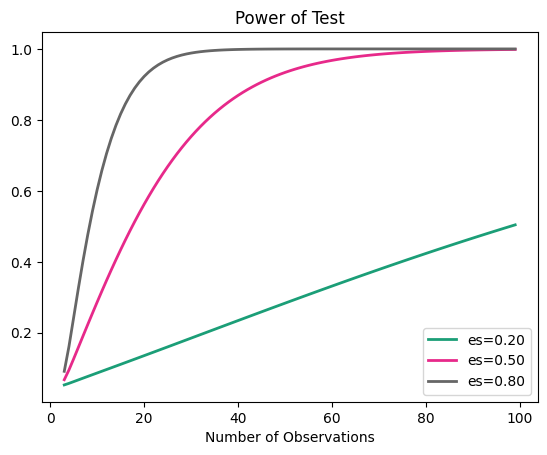

In [81]:
# power analysis varying parameters
effect_sizes_range = np.array([0.2, 0.5, 0.8])
sample_sizes_range = np.array(range(0, 100))

# plot power curves

FTestAnovaPower().plot_power(dep_var='nobs', nobs=sample_sizes_range, effect_size=effect_sizes_range, alpha=alpha, ax=None, title='Power of Test')


plt.show()

In [82]:
df_sexrace = df[["Sex", "Age_group__at_arrest_", "Perceived_Race"]]

In [83]:
df_sexrace.drop(df_sexrace[df_sexrace["Sex"]==2].index, inplace=True)

In [87]:
group_male = df_sexrace[df_sexrace['Sex'] == 1]['Age_group__at_arrest_']
group_female = df_sexrace[df_sexrace['Sex'] == 0]['Age_group__at_arrest_']

In [91]:
t_statistic, p_value = ttest_ind(group_male, group_female)
print("t：", t_statistic)
print("p-value：", p_value)

t： 11.711177144660121
p-value： 1.2026778734785269e-31


In [96]:
d = abs(np.mean(group_male) - np.mean(group_female)) / np.sqrt((np.var(group_male, ddof=1) + np.var(group_female, ddof=1)) / 2)
print("Cohen's d:", d)

Cohen's d: 0.11746676331989879


In [97]:
Sex_mean2 = np.average([Sexgroup1, Sexgroup2], weights=[Sexgroup1, Sexgroup2])

print("Mean of 2 groups is", Sex_mean2)

Mean of 2 groups is 44443.01204222518


In [107]:
from statsmodels.stats.power import TTestIndPower

power_t = TTestIndPower().solve_power(nobs1=52106,ratio=Sexgroup2/Sexgroup1, effect_size = d,
                           power = None, alpha = 0.05, alternative='two-sided')
print('Power: {:.3f}'.format(power_t))




Power: 1.000


In [108]:
n_t = TTestIndPower().solve_power(effect_size=d, alpha=0.05, power = 0.8, 
                    ratio=Sexgroup2/Sexgroup1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 1138.606


**Two-Way ANOVA**

In [109]:
model = ols('Age_group__at_arrest_ ~ C(Sex) + C(Perceived_Race) + C(Sex) : C(Perceived_Race)', data = df).fit()
two_way_table = sm.stats.anova_lm(model, typ = 2)

print (two_way_table)

                                 sum_sq       df           F    PR(>F)
C(Sex)                         0.724252      2.0    0.213580  0.807688
C(Perceived_Race)           6914.394074      7.0  582.581600  0.000000
C(Sex):C(Perceived_Race)      63.714855     14.0    2.684191  0.002762
Residual                  109522.903707  64596.0         NaN       NaN


The p-values for Sex and Perceived_Race turn out to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on Age_group__at_arrest_. The p-value for the interaction effect is also less than 0.05 which depicts that there is sufficient evidence to say there is significant interaction effect between Sex and Race.

**ANCOVA**

In [110]:
#Syntax: pingouin.ancova(data=None, dv=None, between=None, covar=None, effsize=’np2′)

from pingouin import ancova
ancova(data=df, dv='Age_group__at_arrest_', covar='Perceived_Race', between='Sex', )

Source             SS     DF            F         p-unc       np2
0             Sex     338.791744      2    98.953931  1.231793e-43  0.003054
1  Perceived_Race    4014.023002      1  2344.823107  0.000000e+00  0.035020
2        Residual  110605.375499  64611          NaN           NaN       NaN

**Post-Hoc Analysis (Tukey's Test)**



In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [113]:
tukey_Sex = pairwise_tukeyhsd(endog=df['Age_group__at_arrest_'],   
                          groups=df['Sex'],   
                          alpha=0.05)
print(tukey_Sex)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1553    0.0  0.1243 0.1864   True
     0      2   0.1076 0.9682 -0.9334 1.1485  False
     1      2  -0.0478 0.9936 -1.0884 0.9928  False
---------------------------------------------------


In [114]:
tukey_Race = pairwise_tukeyhsd(endog=df['Age_group__at_arrest_'],   
                          groups=df['Perceived_Race'],   
                          alpha=0.05)
print(tukey_Race)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.4633    0.0  0.3965  0.5302   True
     0      2    0.436    0.0  0.3406  0.5314   True
     0      3   0.2579    0.0  0.1588   0.357   True
     0      4    0.168    0.0  0.0921   0.244   True
     0      5   0.3843    0.0  0.3118  0.4568   True
     0      6   0.3676    0.0  0.3042  0.4311   True
     0      7   0.6625    0.0  0.6242  0.7009   True
     1      2  -0.0273 0.9949 -0.1358  0.0812  False
     1      3  -0.2054    0.0 -0.3172 -0.0937   True
     1      4  -0.2953    0.0 -0.3871 -0.2035   True
     1      5   -0.079 0.1248  -0.168  0.0099  False
     1      6  -0.0957 0.0093 -0.1775 -0.0139   True
     1      7   0.1992    0.0  0.1349  0.2635   True
     2      3  -0.1781  0.001  -0.309 -0.0473   True
     2      4   -0.268    0.0 -0.3823 -0.1537   True
     2      5  -0.0517  0.858 -0.1637  0.0603 

**Logistic Regression**

In [115]:
df_new = df[["Actions_at_arrest___Combative__", "Sex", "Age_group__at_arrest_", "Actions_at_arrest___Cooperative"]]

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64615 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Actions_at_arrest___Combative__  64615 non-null  int64
 1   Sex                              64615 non-null  int64
 2   Age_group__at_arrest_            64615 non-null  int64
 3   Actions_at_arrest___Cooperative  64615 non-null  int64
dtypes: int64(4)
memory usage: 4.5 MB


In [117]:
set(df_new["Actions_at_arrest___Combative__"].tolist())

{0, 1}

In [118]:
set(df_new["Sex"].tolist())

{0, 1, 2}

In [119]:
df_new["Sex"].tolist().count(2)

9

In [120]:
set(df_new["Age_group__at_arrest_"].tolist())

{0, 1, 2, 3, 4, 5, 6}

In [121]:
set(df_new["Actions_at_arrest___Cooperative"].tolist())

{0, 1}

In [122]:
df_new.drop(df_new[df_new["Sex"]==2].index, inplace=True)

In [123]:
df_new.head()

Actions_at_arrest___Combative__  Sex  Age_group__at_arrest_  \
0                                0    1                      3   
1                                0    1                      3   
2                                0    1                      3   
3                                0    1                      2   
4                                0    1                      2   

   Actions_at_arrest___Cooperative  
0                                1  
1                                0  
2                                0  
3                                0  
4                                0

**Linear Regression**

In [124]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Combative
x = df_new[["Actions_at_arrest___Combative__"]]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
a=model.intercept_
b=model.coef_
print("Best-fit line: intercept a=", a, "regression coefficient b=", b)

Best-fit line: intercept a= 2.5687000810278966 regression coefficient b= [0.05328119]


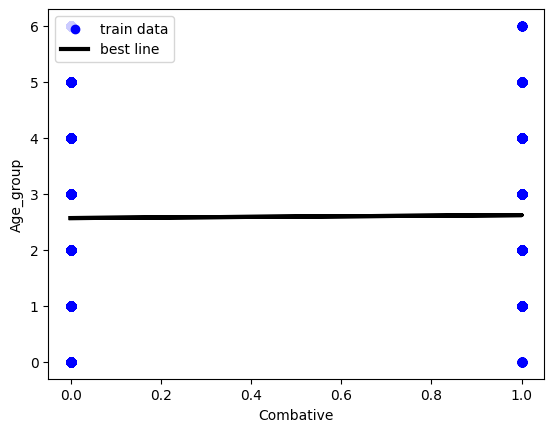

In [126]:
'''
'Aged 17 years and under': 0,
'Aged 18 to 24 years': 1,
'Aged 25 to 34 years': 2,
'Aged 35 to 44 years': 3,
'Aged 45 to 54 years': 4,
'Aged 55 to 64 years': 5,
'Aged 65 years and older': 6,

'''

# train scatter
plt.scatter(X_train, y_train, color='blue', label="train data")
# predit
y_train_pred = model.predict(X_train)
# fit line
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.legend(loc=2)
plt.xlabel("Combative")
plt.ylabel("Age_group")
plt.show()

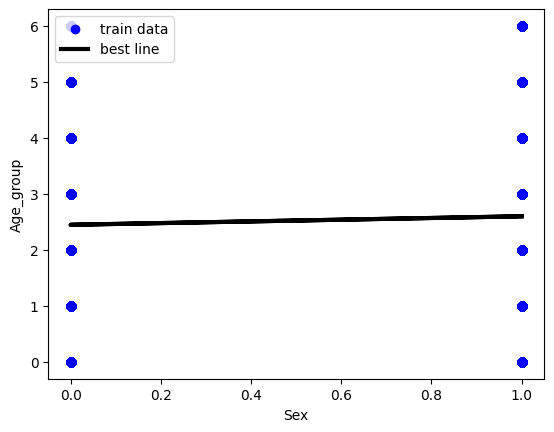

In [127]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Sex
x = df_new[["Sex"]]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)
# train scatter
plt.scatter(X_train, y_train, color='blue', label="train data")
# predit
y_train_pred = model.predict(X_train)
# fit line
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.legend(loc=2)
plt.xlabel("Sex")
plt.ylabel("Age_group")
plt.show()

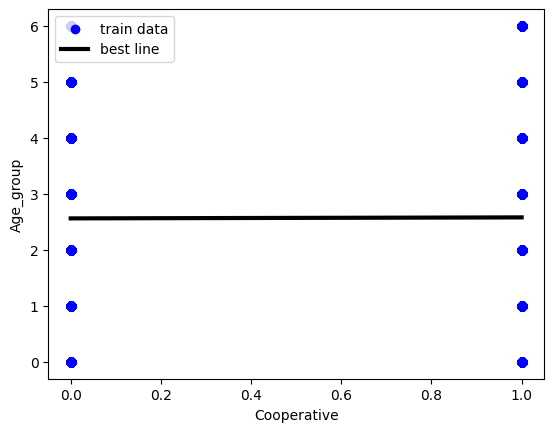

In [128]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Cooperative
x = df_new[["Actions_at_arrest___Cooperative"]]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)
# train scatter
plt.scatter(X_train, y_train, color='blue', label="train data")
# predit
y_train_pred = model.predict(X_train)
# fit line
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.legend(loc=2)
plt.xlabel("Cooperative")
plt.ylabel("Age_group")
plt.show()

**Logistic Regression**

In [129]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Combative

x = df_new["Actions_at_arrest___Combative__"]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train_new=X_train.values.reshape(-1,1)
X_test_new=X_test.values.reshape(-1,1)
model = LogisticRegression()
model.fit(X_train_new, y_train)
test_predict=model.predict(X_test_new)

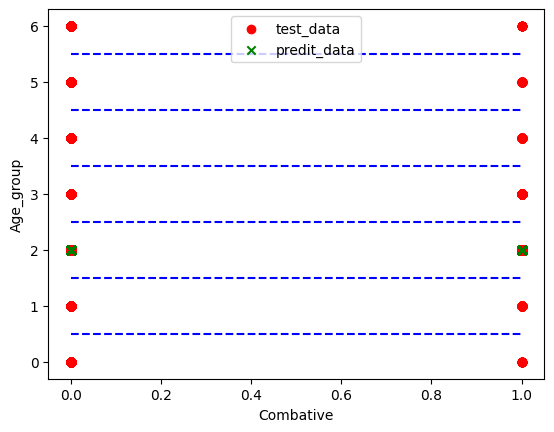

In [130]:
plt.scatter(X_test, y_test, color='red', marker='o', label='test_data') 
plt.scatter(X_test, test_predict, color='green', marker='x', label='predit_data')

plt.plot((0,1),(5.5,5.5),'b--')
plt.plot((0,1),(4.5,4.5),'b--')
plt.plot((0,1),(3.5,3.5),'b--')
plt.plot((0,1),(2.5,2.5),'b--')
plt.plot((0,1),(1.5,1.5),'b--')
plt.plot((0,1),(0.5,0.5),'b--')

plt.legend(loc=9)
plt.xlabel("Combative")
plt.ylabel("Age_group")
plt.show()

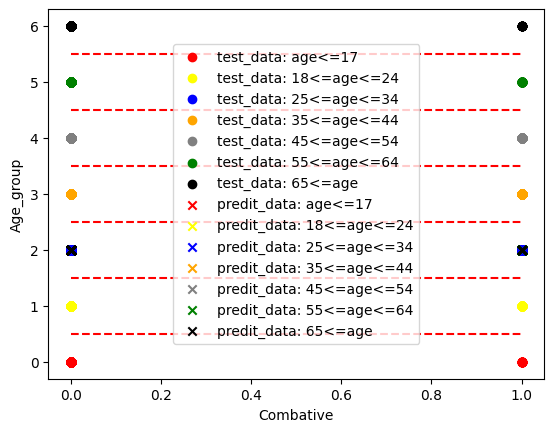

In [131]:
x_test_0 = []
x_test_1 = []
x_test_2 = []
x_test_3 = []
x_test_4 = []
x_test_5 = []
x_test_6 = []

y_test_0 = []
y_test_1 = []
y_test_2 = []
y_test_3 = []
y_test_4 = []
y_test_5 = []
y_test_6 = []

y_predit_0 = []
y_predit_1 = []
y_predit_2 = []
y_predit_3 = []
y_predit_4 = []
y_predit_5 = []
y_predit_6 = []


for x ,y , y_predit in zip(X_test, y_test, test_predict):
    if y == 0:
        x_test_0.append(x)
        y_test_0.append(y)
        y_predit_0.append(y_predit)
    elif y == 1:
        x_test_1.append(x)
        y_test_1.append(y)
        y_predit_1.append(y_predit)
    elif y == 2:
        x_test_2.append(x)
        y_test_2.append(y)
        y_predit_2.append(y_predit)
    elif y == 3:
        x_test_3.append(x)
        y_test_3.append(y)
        y_predit_3.append(y_predit)
    elif y == 4:
        x_test_4.append(x)
        y_test_4.append(y)
        y_predit_4.append(y_predit)
    elif y == 5:
        x_test_5.append(x)
        y_test_5.append(y)
        y_predit_5.append(y_predit)
    else:
        x_test_6.append(x)
        y_test_6.append(y)
        y_predit_6.append(y_predit)


plt.scatter(x_test_0, y_test_0, color='red', marker='o', label='test_data: age<=17 ')
plt.scatter(x_test_1, y_test_1, color='yellow', marker='o', label='test_data: 18<=age<=24')
plt.scatter(x_test_2, y_test_2, color='blue', marker='o', label='test_data: 25<=age<=34')
plt.scatter(x_test_3, y_test_3, color='orange', marker='o', label='test_data: 35<=age<=44')
plt.scatter(x_test_4, y_test_4, color='gray', marker='o', label='test_data: 45<=age<=54')
plt.scatter(x_test_5, y_test_5, color='green', marker='o', label='test_data: 55<=age<=64')
plt.scatter(x_test_6, y_test_6, color='black', marker='o', label='test_data: 65<=age')

# plt.scatter(X_test, test_predict, color='green', marker='x', label='yyy') 
plt.scatter(x_test_0, y_predit_0, color='red', marker='x', label='predit_data: age<=17 ')
plt.scatter(x_test_1, y_predit_1, color='yellow', marker='x', label='predit_data: 18<=age<=24')
plt.scatter(x_test_2, y_predit_2, color='blue', marker='x', label='predit_data: 25<=age<=34')
plt.scatter(x_test_3, y_predit_3, color='orange', marker='x', label='predit_data: 35<=age<=44')
plt.scatter(x_test_4, y_predit_4, color='gray', marker='x', label='predit_data: 45<=age<=54')
plt.scatter(x_test_5, y_predit_5, color='green', marker='x', label='predit_data: 55<=age<=64')
plt.scatter(x_test_6, y_predit_6, color='black', marker='x', label='predit_data: 65<=age')

plt.plot((0,1),(5.5,5.5),'r--')
plt.plot((0,1),(4.5,4.5),'r--')
plt.plot((0,1),(3.5,3.5),'r--')
plt.plot((0,1),(2.5,2.5),'r--')
plt.plot((0,1),(1.5,1.5),'r--')
plt.plot((0,1),(0.5,0.5),'r--')

plt.legend(loc=10)
plt.xlabel("Combative")
plt.ylabel("Age_group")
plt.show()

In [133]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Sex
x = df_new["Sex"]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train_new=X_train.values.reshape(-1,1)
X_test_new=X_test.values.reshape(-1,1)
model = LogisticRegression()
model.fit(X_train_new, y_train)
test_predict=model.predict(X_test_new)

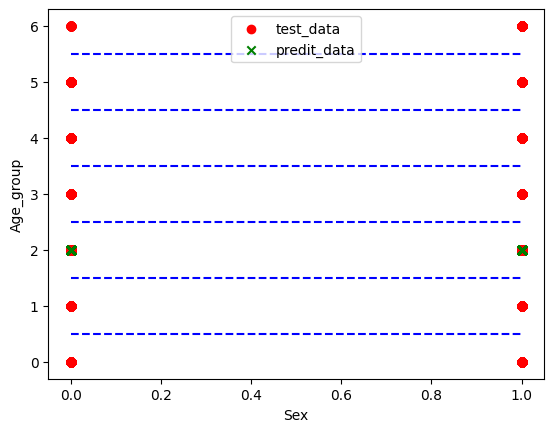

In [134]:
plt.scatter(X_test, y_test, color='red', marker='o', label='test_data') 
plt.scatter(X_test, test_predict, color='green', marker='x', label='predit_data')

plt.plot((0,1),(5.5,5.5),'b--')
plt.plot((0,1),(4.5,4.5),'b--')
plt.plot((0,1),(3.5,3.5),'b--')
plt.plot((0,1),(2.5,2.5),'b--')
plt.plot((0,1),(1.5,1.5),'b--')
plt.plot((0,1),(0.5,0.5),'b--')

plt.legend(loc=9)
plt.xlabel("Sex")
plt.ylabel("Age_group")
plt.show()

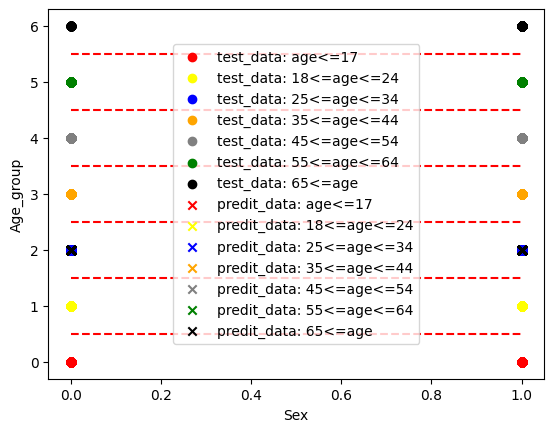

In [135]:
x_test_0 = []
x_test_1 = []
x_test_2 = []
x_test_3 = []
x_test_4 = []
x_test_5 = []
x_test_6 = []

y_test_0 = []
y_test_1 = []
y_test_2 = []
y_test_3 = []
y_test_4 = []
y_test_5 = []
y_test_6 = []

y_predit_0 = []
y_predit_1 = []
y_predit_2 = []
y_predit_3 = []
y_predit_4 = []
y_predit_5 = []
y_predit_6 = []


for x ,y , y_predit in zip(X_test, y_test, test_predict):
    if y == 0:
        x_test_0.append(x)
        y_test_0.append(y)
        y_predit_0.append(y_predit)
    elif y == 1:
        x_test_1.append(x)
        y_test_1.append(y)
        y_predit_1.append(y_predit)
    elif y == 2:
        x_test_2.append(x)
        y_test_2.append(y)
        y_predit_2.append(y_predit)
    elif y == 3:
        x_test_3.append(x)
        y_test_3.append(y)
        y_predit_3.append(y_predit)
    elif y == 4:
        x_test_4.append(x)
        y_test_4.append(y)
        y_predit_4.append(y_predit)
    elif y == 5:
        x_test_5.append(x)
        y_test_5.append(y)
        y_predit_5.append(y_predit)
    else:
        x_test_6.append(x)
        y_test_6.append(y)
        y_predit_6.append(y_predit)


plt.scatter(x_test_0, y_test_0, color='red', marker='o', label='test_data: age<=17 ')
plt.scatter(x_test_1, y_test_1, color='yellow', marker='o', label='test_data: 18<=age<=24')
plt.scatter(x_test_2, y_test_2, color='blue', marker='o', label='test_data: 25<=age<=34')
plt.scatter(x_test_3, y_test_3, color='orange', marker='o', label='test_data: 35<=age<=44')
plt.scatter(x_test_4, y_test_4, color='gray', marker='o', label='test_data: 45<=age<=54')
plt.scatter(x_test_5, y_test_5, color='green', marker='o', label='test_data: 55<=age<=64')
plt.scatter(x_test_6, y_test_6, color='black', marker='o', label='test_data: 65<=age')

# plt.scatter(X_test, test_predict, color='green', marker='x', label='yyy') 
plt.scatter(x_test_0, y_predit_0, color='red', marker='x', label='predit_data: age<=17 ')
plt.scatter(x_test_1, y_predit_1, color='yellow', marker='x', label='predit_data: 18<=age<=24')
plt.scatter(x_test_2, y_predit_2, color='blue', marker='x', label='predit_data: 25<=age<=34')
plt.scatter(x_test_3, y_predit_3, color='orange', marker='x', label='predit_data: 35<=age<=44')
plt.scatter(x_test_4, y_predit_4, color='gray', marker='x', label='predit_data: 45<=age<=54')
plt.scatter(x_test_5, y_predit_5, color='green', marker='x', label='predit_data: 55<=age<=64')
plt.scatter(x_test_6, y_predit_6, color='black', marker='x', label='predit_data: 65<=age')

plt.plot((0,1),(5.5,5.5),'r--')
plt.plot((0,1),(4.5,4.5),'r--')
plt.plot((0,1),(3.5,3.5),'r--')
plt.plot((0,1),(2.5,2.5),'r--')
plt.plot((0,1),(1.5,1.5),'r--')
plt.plot((0,1),(0.5,0.5),'r--')

plt.legend(loc=10)
plt.xlabel("Sex")
plt.ylabel("Age_group")
plt.show()

In [136]:
# x = df[["Actions_at_arrest___Combative__", "Sex", "Actions_at_arrest___Cooperative"]]
# Cooperative
x = df_new["Actions_at_arrest___Cooperative"]
y = df_new["Age_group__at_arrest_"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
X_train_new=X_train.values.reshape(-1,1)
X_test_new=X_test.values.reshape(-1,1)
model = LogisticRegression()
model.fit(X_train_new, y_train)
test_predict=model.predict(X_test_new)

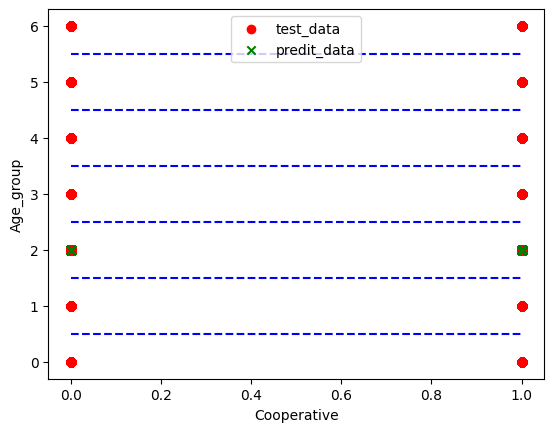

In [137]:
plt.scatter(X_test, y_test, color='red', marker='o', label='test_data') 
plt.scatter(X_test, test_predict, color='green', marker='x', label='predit_data')

plt.plot((0,1),(5.5,5.5),'b--')
plt.plot((0,1),(4.5,4.5),'b--')
plt.plot((0,1),(3.5,3.5),'b--')
plt.plot((0,1),(2.5,2.5),'b--')
plt.plot((0,1),(1.5,1.5),'b--')
plt.plot((0,1),(0.5,0.5),'b--')

plt.legend(loc=9)
plt.xlabel("Cooperative")
plt.ylabel("Age_group")
plt.show()

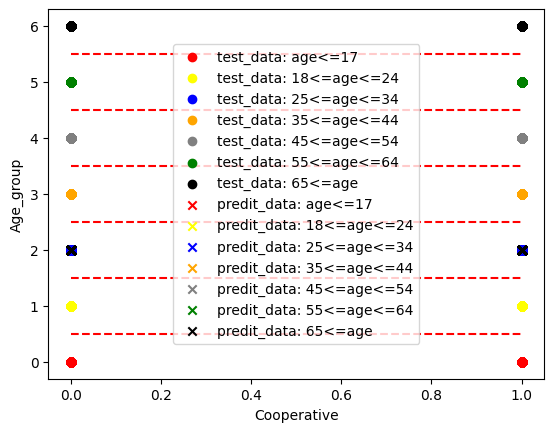

In [138]:
x_test_0 = []
x_test_1 = []
x_test_2 = []
x_test_3 = []
x_test_4 = []
x_test_5 = []
x_test_6 = []

y_test_0 = []
y_test_1 = []
y_test_2 = []
y_test_3 = []
y_test_4 = []
y_test_5 = []
y_test_6 = []

y_predit_0 = []
y_predit_1 = []
y_predit_2 = []
y_predit_3 = []
y_predit_4 = []
y_predit_5 = []
y_predit_6 = []


for x ,y , y_predit in zip(X_test, y_test, test_predict):
    if y == 0:
        x_test_0.append(x)
        y_test_0.append(y)
        y_predit_0.append(y_predit)
    elif y == 1:
        x_test_1.append(x)
        y_test_1.append(y)
        y_predit_1.append(y_predit)
    elif y == 2:
        x_test_2.append(x)
        y_test_2.append(y)
        y_predit_2.append(y_predit)
    elif y == 3:
        x_test_3.append(x)
        y_test_3.append(y)
        y_predit_3.append(y_predit)
    elif y == 4:
        x_test_4.append(x)
        y_test_4.append(y)
        y_predit_4.append(y_predit)
    elif y == 5:
        x_test_5.append(x)
        y_test_5.append(y)
        y_predit_5.append(y_predit)
    else:
        x_test_6.append(x)
        y_test_6.append(y)
        y_predit_6.append(y_predit)


plt.scatter(x_test_0, y_test_0, color='red', marker='o', label='test_data: age<=17 ')
plt.scatter(x_test_1, y_test_1, color='yellow', marker='o', label='test_data: 18<=age<=24')
plt.scatter(x_test_2, y_test_2, color='blue', marker='o', label='test_data: 25<=age<=34')
plt.scatter(x_test_3, y_test_3, color='orange', marker='o', label='test_data: 35<=age<=44')
plt.scatter(x_test_4, y_test_4, color='gray', marker='o', label='test_data: 45<=age<=54')
plt.scatter(x_test_5, y_test_5, color='green', marker='o', label='test_data: 55<=age<=64')
plt.scatter(x_test_6, y_test_6, color='black', marker='o', label='test_data: 65<=age')

# plt.scatter(X_test, test_predict, color='green', marker='x', label='yyy') 
plt.scatter(x_test_0, y_predit_0, color='red', marker='x', label='predit_data: age<=17 ')
plt.scatter(x_test_1, y_predit_1, color='yellow', marker='x', label='predit_data: 18<=age<=24')
plt.scatter(x_test_2, y_predit_2, color='blue', marker='x', label='predit_data: 25<=age<=34')
plt.scatter(x_test_3, y_predit_3, color='orange', marker='x', label='predit_data: 35<=age<=44')
plt.scatter(x_test_4, y_predit_4, color='gray', marker='x', label='predit_data: 45<=age<=54')
plt.scatter(x_test_5, y_predit_5, color='green', marker='x', label='predit_data: 55<=age<=64')
plt.scatter(x_test_6, y_predit_6, color='black', marker='x', label='predit_data: 65<=age')

plt.plot((0,1),(5.5,5.5),'r--')
plt.plot((0,1),(4.5,4.5),'r--')
plt.plot((0,1),(3.5,3.5),'r--')
plt.plot((0,1),(2.5,2.5),'r--')
plt.plot((0,1),(1.5,1.5),'r--')
plt.plot((0,1),(0.5,0.5),'r--')

plt.legend(loc=10)
plt.xlabel("Cooperative")
plt.ylabel("Age_group")
plt.show()